<a href="https://colab.research.google.com/github/DD-SQUARED/University-Physics-Projects/blob/main/X_ray_Absorption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

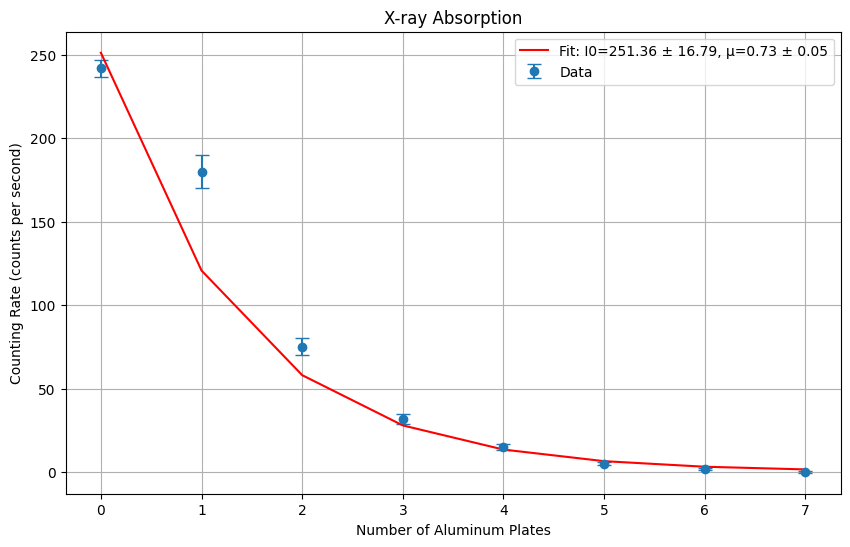

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function
def exponential_decay(x, I0, mu):
    return I0 * np.exp(-mu * x)

# X-ray absorption data
plates = np.array([0, 1, 2, 3, 4, 5, 6, 7])
counts = np.array([242, 180, 75, 32, 15, 5, 1.7, 0])  # Exclude negative value
errors = np.array([5, 10, 5, 3, 2, 1, 0.5, 0.5])  # Example error values for counting rate

# Fit the data to the exponential decay model
params, covariance = curve_fit(exponential_decay, plates, counts, sigma=errors, p0=[242, 0.1])
I0, mu = params
I0_error, mu_error = np.sqrt(np.diag(covariance))  # Compute errors for the parameters

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.errorbar(plates, counts, yerr=errors, fmt='o', label='Data', capsize=5)
plt.plot(plates, exponential_decay(plates, *params), 'r-', label=f'Fit: I0={I0:.2f} ± {I0_error:.2f}, μ={mu:.2f} ± {mu_error:.2f}')
plt.xlabel('Number of Aluminum Plates')
plt.ylabel('Counting Rate (counts per second)')
plt.title('X-ray Absorption')
plt.legend()
plt.grid(True)
plt.show()
